## Introduction

This material was prepared by **Danie Benetton**.

Project financially supported by the University of British Columbia, Department of Chemical and Biological Engineering (CBHE).

July 2020

This Jupyter Notebook is an overview of the functions for Laplace transforms and Control Systems that are used in CHBE coursework.

## Instructions
**Preferred method:**

To use this notebook, make sure Anaconda is installed [Link to Download](https://www.anaconda.com/products/individual)

This tutorial is best run in **JupyterLab.** [JupyterLab Introduction Video](https://www.youtube.com/watch?v=A5YyoCKxEOU). 

Ensure that you have the JupyterLab extension "@jupyterlab/toc" installed to navigate this document. This can be easily installed through the Extension Manager.

**Alternative method:**

UBC students and professors can also access this notebook through [Syzygy](https://ubc.syzygy.ca/). Log in with your CWL, upload this notebook to your files, and run the notebook.

## Installing the Control Library

For this notebook, the installation of the **Control library is required.** Installation instructions, as well as general information about the library, can be found [in the documentation.](https://python-control.readthedocs.io/en/0.8.3/intro.html)


There are other libraries that will be needed for the use of the control library, most of which are likely already installed. These include:
- NumPy
- SciPy
- matplotlib

## Matplotlib settings

In [68]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update({'mathtext.fontset': 'cm'})
mpl.rcParams.update({'axes.labelsize': 14})
mpl.rcParams.update({'axes.titlesize': 14})
mpl.rcParams.update({'axes.linewidth': 0.5})
mpl.rcParams.update({'xtick.labelsize': 12})
mpl.rcParams.update({'ytick.labelsize': 12})
%config InlineBackend.figure_formats = ['svg']

# Laplace Transforms

In solving the models of dynamic processes, it is often required to find the solutions of differential equations. Depending on the form of the equations, considerable effort may be required to solve the equations analytically. In the case of **linear systems**, we can use **Laplace Transforms** to decrease the effort needed to find solutions. 

The **SymPy library** is used in Python for symbolic computation. **Run the code cell below** to import the function for Laplace transforms from SymPy library.

In [69]:
from sympy.integrals import laplace_transform

The documentation for this function is found [here.](https://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.transforms.laplace_transform)
  

The `laplace_transform` function is of the the following form:

```python
laplace_transform(f, t, s) 
```
 
where $f$ is the function of a real variable (which for the purpose of this notebook is time), $t$ which is the real variable time, and $s$ which is the complex variable. 

The function will return `(F, a, cond)` where $F$ is the Laplace transform of $f$, $Re(s)>a$ is the half-plane of convergence, and $cond$ are auxiliary convergence conditions.

## Example 1: Basic Functions

To demonstrate the general mechanics of the Laplace transform function, we'll start off with some simple functions for which the Laplace transform can be found in tables such as [this one.](https://www.rapidtables.com/math/calculus/laplace_transform.html)

1. The Laplace transform of the function $f(t) = a$ (where $a$ is a constant) is known to be $\frac{a}{s}$. Confirm that the `laplace_transform` function works as expected by finding the known results. 

**Solution:**  
To perform calculations in SymPy using symbols, we must first export the desired symbols from the `sympy.abc` module, which contains all latin and greek letters as symbols. More information about this module may be found [here.](https://docs.sympy.org/latest/modules/abc.html)

Next, call the `laplace_transform` function with the arguments: function, real variable, complex variable.

The expected results are:

```python
(a/s, 0, True)
```

In [70]:
# from sympy.integrals import laplace_transform # Uncomment line if not imported already

from sympy.abc import t, s, a # Exporting desired symbols

laplace_transform(a, t, s) # Perform laplace transform on function f(t) = a (constant)

(a/s, 0, True)

2. The Laplace transform of the function $f(t)=cos(at)$ (where $a$ is a constant) is known to be $\frac{s}{s^2+a^2}$. Confirm that the `laplace_transform` function works as expected by finding the known results. 

**Solution:**

SymPy contains many built-in mathematical functions, similar to NumPy. To export these functions from the library, we can use one of two methods:

1. ```python
from sympy import cos
``` 
: this will import only the `cos()` function
2. ```python
from sympy import *
```
: this will import all of the functions from the SymPy library

This example uses the second method, as the examples below will call several SymPy functions.


In [71]:
from sympy.abc import t, s, a # Exporting desired symbols
from sympy import *

sol = laplace_transform(cos(a*t), t, s) 

# To show only the laplace transform, in easier to read formatting
sol[0]

s/(a**2 + s**2)

## Example 2: Laplace Transform of Dirac Delta Function

1. The known Laplace transform of the **Dirac delta function** $f(t) = \delta(t)$ is 1. Confirm this result below. 

**Solution:**

The SymPy library has a function called `DiracDelta()` that must be called.

> **Note:** If you have not yet imported all of the functions from SymPy, ensure you import the `DiracDelta()` function.

In [72]:
laplace_transform(DiracDelta(t), t, s) 

(1 - Heaviside(0), -oo, True)

2. The known Laplace transform of the delayed Dirac delta function $f(t) = \delta(t-a)$ is $e^{-as}$. Confirm this result below. 

In [73]:
# Delayed Dirac Delta f(t) = delta(t-a) solution: e^(-as)
laplace_transform(DiracDelta(t-2),t ,s)

(exp(-2*s), -oo, True)

## Example 3: More Involved Functions

The SymPy package has many other useful built-in functions which we will explore below through the use of examples.

**A full list of functions may be found [here](https://docs.sympy.org/latest/modules/functions/index.html)**

1. Determine the Laplace transform of the function $f(t) = (3+e^{6t})^2$. Display the results in the expanded partial fraction form.

**Solution:**

The Laplace transform may be found using the same method as above examples. For neatness, the function $f(t)$ is defined on a separate line.

The SymPy function `apart()` takes a function as an argument and computes the **partial fraction decomposition.** 

To verify the result, we can use the function `together()` which performs the opposite operations. 

In [74]:
# from sympy import *
def f(t): return (3 + exp(6*t))**2
sol = laplace_transform(f(t),t ,s)

apart(sol[0])

6/(s - 6) + 1/(s - 12) + 9/s

In [75]:
together(sol[0])

8*(2*s**2 - 30*s + 81)/(s*(s**2 - 18*s + 72))

Another special function is the **Heaviside function**, also known as a step function, documentation [here.](https://docs.sympy.org/latest/modules/functions/special.html#heaviside)

2. Find the Laplace transform of the following:

$$
f(t) = 10u_{12}(t) + 2(t-6)u_6(t)-(7-e^{12-3t})u_4(t)
$$

**Solution:** 

To represent Heaviside function $u_c(t)$ in Python, we must first convert the notation to $u(t-c)$. Then, we can enter the Heaviside function as `Heaviside(t-c)` and proceed with solving as usual. 

> **Note:** In this example, each term of the function has the Laplace transform performed separately. This is to obtain similarly formatted results as would be achieved manually. Alternatively, function format may be changed using SymPy's simplification functions, found [here.](https://docs.sympy.org/latest/tutorial/simplification.html)

In [76]:
from sympy import *
from sympy.abc import t, s, a # Exporting desired symbols

def f1(t): return 10*Heaviside(t-12)
sol1 = laplace_transform(f1(t),t ,s)

def f2(t): return 2*((t-6)**3)*Heaviside(t-6)
sol2 = laplace_transform(f2(t),t ,s)

def f3(t): return -(7-exp(12-3*t))*Heaviside(t-4)
sol3 = laplace_transform(f3(t),t ,s)

sum([sol1[0], sol2[0], sol3[0]])

10*exp(-12*s)/s - (6*s + 21)*exp(-4*s)/(s*(s + 3)) + 12*exp(-6*s)/s**4

## Inverse Laplace Transform

SymPy also has a function to perform the inverse Laplace transform, documentation found [here.](https://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.transforms.inverse_laplace_transform)

The syntax of this function is very similar to that of `laplace_transform()`, and will be demonstrated with the following example.

1. Find the inverse Laplace transform of the following:

$$
\frac{8}{s+5}+\frac{7}{s^2+3}
$$

**Solution:** 

The inverse Laplace transform is $8e^{-5t}+\frac{7}{\sqrt{3}}sin\sqrt{3}t $

> Note: The variable $t$ should be defined as a positive variable, otherwise the function will include the Heaviside function.

In [77]:
from sympy import *
from sympy.abc import t, s, a # Exporting desired symbols

t = symbols("t", positive=True)

def F(s): return (8/(s+5))+(7/(s**2+3)) 

inverse_laplace_transform(F(s), s, t)

7*sqrt(3)*sin(sqrt(3)*t)/3 + 8*exp(-5*t)

# Intro to Control Library

The **Python control systems library** is a package that has many functions used in the analysis and design of feedback control systems.  
Full documentation for the library can be found [here.](https://python-control.readthedocs.io/en/0.8.3/)

To **import** the control library, run the following code cell below:

In [78]:
import control

If an error appears, it is likely that the package is not installed correctly. Please refer to the [documentation.](https://python-control.readthedocs.io/en/0.8.3/intro.html#installation)

## First Order Transfer Functions

<a id='tf_def'></a>
Given a first order transfer function: 

$$G(s) = \frac{10}{5s+1}$$

We can create a transfer function system using the function `control.tf`, documentation [here.](https://python-control.readthedocs.io/en/0.8.1/generated/control.tf.html) **Run the cell below** to import this function:

In [79]:
# Import control.tf under a nickname
from control import tf as tf

There are two ways that we can define a transfer function.

1. Specify the transfer function using `tf(num, den)`, with each $num$ and $den$ being arrays of coefficients starting with the **highest common power of $s$ between the numerator and denominator**, incrementing all the way down to the constant term.
2. A shortcut method, where we can specify the $s$ variable using `tf([1,0],[0,1])`, and then specify the transfer function algebraically. 


In [80]:
# Method 1

# Specify our single-input single-output transfer function
G = tf([0,10],[5,1])

# Print the TF to make sure it looks correct:
print(G)


  10
-------
5 s + 1



In [81]:
# Method 2

# Specify the s variable
s = tf([1,0],[0,1])

# Specify G algebraically and confirm it looks correct
G = 10/(5*s+1)
print(G)


  10
-------
5 s + 1



> The output of each function is the same, but the advantage of entering the transfer function algebraically is that it is easier to spot mistakes.

## Time Domain Response of Single Input Single Output Systems

The control library has a function to simulate the output of a linear system when given the transfer function, the input, time steps, and initial condition. Then we can take the output and graph the response of the system to a given input.

This method uses the `control.matlab.lsim` submodule, which will simulate any **user-given time response.** First we specify a grid variable for the time axis, then a $u'$ variable for our deviation forcing term, which matches the grid of time axis.

>This example will generate the response of the transfer function defined above in response to a step input of 1.

In [82]:
import control.matlab
import numpy as np
import matplotlib.pyplot as plt
# Specify time axis
time_start = 0
time_end = 100
n_time = 101
time = np.linspace(time_start,time_end,n_time)

M = 1; # Step response magnitude
u_dev = M*np.ones_like(time)

The response output $y$ is calculated using the function call `control.matlab.lsim(sys,u,t,y0)` where:
* $sys$ is the system transfer function
* $u$ is the input trajectory
* $t$ is the time axis
* $y0$ is the initial condition $y(0)$, with a default value of $0$

The function will return the outputs $y$, $t$, and $x$ where:
* $y$ represents the output (equal to $y'(t)$ if you specify zero initial conditions)
* $t$ represents the time axis, should be identical to $t$ input
* $x$ represents the state trajectories of the system

Text(0, 0.5, "y'(t)")

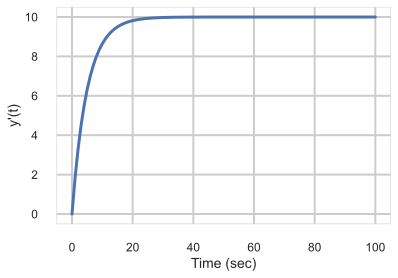

In [83]:
y_dev, time_axis, x_out = control.matlab.lsim(G,u_dev,time)

plt.plot(time,y_dev)
plt.xlabel('Time (sec)')
plt.ylabel("y'(t)")

Another method to simulate a **step response** is using the `control.step_response` function. To use this function, call `control.step_response(G, t)` where $G$ is the transfer function defined previously and $t$ the time axis. This function returns $t$,$y$.

Text(0, 0.5, "$ y'(t) $")

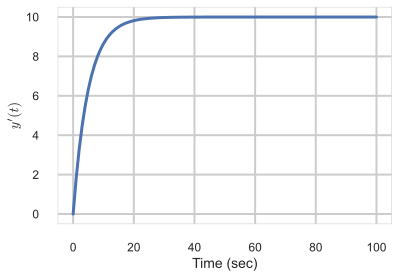

In [84]:
# Compute and plot step response using shortcut method:
time_again, y_dev_shortcut = control.step_response(G,time)

plt.plot(time,y_dev_shortcut)
plt.xlabel('Time (sec)')
plt.ylabel("$ y'(t) $")

Next, we can calculate and plot the **unit impulse response** for the following transfer function:
$$G(s)=\frac{5}{10s^2+s}$$
Assume *zero initial conditions for all variables.*

We will use a similar specialized function, `control.impulse_response`. 


    5
----------
10 s^2 + s



Text(0, 0.5, "y'(t)")

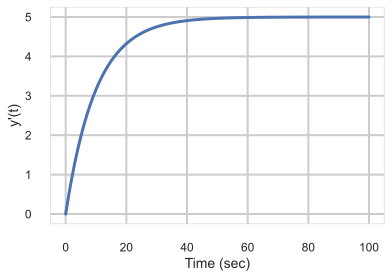

In [85]:
# Define transfer function
G2 = 5/(10*s**2 + s)
print(G2)

# Define time axis
time_start = 0
time_end = 100
n_time = 101
time = np.linspace(time_start,time_end,n_time)

time_again, y_dev_shortcut = control.impulse_response(G2,time)


plt.plot(time,y_dev_shortcut)
plt.xlabel('Time (sec)')
plt.ylabel("y'(t)")

## Second Order Transfer Functions

Second order and also **higher order** transfer functions can be defined using the same two methods described [above.](#tf_def)

A second order transfer function has the following **standard form**:

$$ G(s) = \frac{K}{\tau^2 s^2 + 2 \zeta \tau s + 1}$$

As an example, we will define the following second order transfer function using the shortcut method:

$$ G(s) = \frac{4}{s^2 + 2s + 4}$$



In [86]:
import control.matlab
import numpy as np
import matplotlib.pyplot as plt

# Specify the s variable
s = tf([1,0],[0,1])

# Specify G algebraically and confirm it looks correct
G = 4/(s**2+2*s+4)
print(G)


      4
-------------
s^2 + 2 s + 4



As with first order systems, we can simulate the system in the time domain using the `step_response()`, `impulse_response()`, or `lsim()` for a user-defined response.

### Stability and Oscillations

The stability and oscillatory response depend on the **damping** of the system, characterized by the value of $\zeta$

There are three classes of **stable** second order transfer functions 
1. **Overdamped** ($\zeta > 1$)
2. **Critically damped** ($\zeta = 1$)
3. **Underdamped** ($0 < \zeta < 1$) - will produce oscillations

An **undamped** process is considered to be unstable, since the size of oscillations does not decrease over time and so there is no definite final value.

4. **Undamped** ($\zeta = 0$)

As well, there are two more classes of **unstable** second order transfer functions:

5. **Unstable, oscillatory** ($-1 < \zeta < 0$)
6. **Unstable, non-oscillatory** ($\zeta \leq -1$)


Suppose we have a dynamic system which can be described by the transfer function:

$$ G(s) = \frac{K}{\tau^2 s^2 + 2 \zeta \tau s + 1}$$

In the following code, we'll compare the different classes by varying $\zeta$, while keeping constant $K=1$, $\tau = 1$

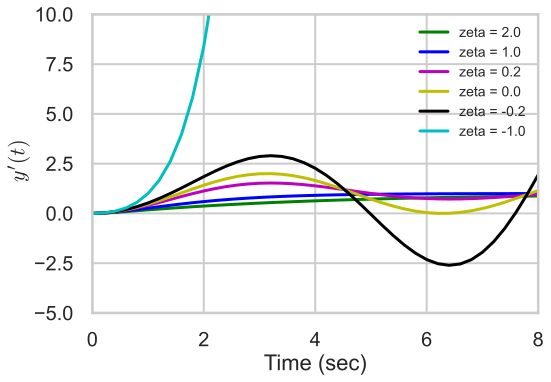

In [87]:
# Import control.tf submodule using a compact nickname:
from control import tf as tf
import numpy as np

# Specify the s variable:
s = tf([1,0],[0,1])

# Define constants
K = 1
tau = 1
zeta_1 = 2
zeta_2 = 1
zeta_3 = 0.2
zeta_4 = 0
zeta_5 = -0.2
zeta_6 = -1

# Define transfer functions
G_1 = K/(tau**2*s**2 + 2*zeta_1*tau*s + 1)
G_2 = K/(tau**2*s**2 + 2*zeta_2*tau*s + 1)
G_3 = K/(tau**2*s**2 + 2*zeta_3*tau*s + 1)
G_4 = K/(tau**2*s**2 + 2*zeta_4*tau*s + 1)
G_5 = K/(tau**2*s**2 + 2*zeta_5*tau*s + 1)
G_6 = K/(tau**2*s**2 + 2*zeta_6*tau*s + 1)

# Specify time axis
time_start = 0
time_end = 20
n_time = 101
time = np.linspace(time_start,time_end,n_time)

# Compute step responses numerically:
time_check_1, y_dev_1 = control.step_response(G_1,time)
time_check_2, y_dev_2 = control.step_response(G_2,time)
time_check_3, y_dev_3 = control.step_response(G_3,time)
time_check_4, y_dev_4 = control.step_response(G_4,time)
time_check_5, y_dev_5 = control.step_response(G_5,time)
time_check_6, y_dev_6 = control.step_response(G_6,time)

# Compare curves on the same plot:
import seaborn as sb
plt.style.use('seaborn')
sb.set_context('poster')
sb.set_style('whitegrid')

plt.plot(time,y_dev_1,'g-',label='zeta = %.1f' %(zeta_1))
plt.plot(time,y_dev_2,'b-',label='zeta = %.1f' %(zeta_2))
plt.plot(time,y_dev_3,'m-',label='zeta = %.1f' %(zeta_3))
plt.plot(time,y_dev_4,'y-',label='zeta = %.1f' %(zeta_4))
plt.plot(time,y_dev_5,'k-',label='zeta = %.1f' %(zeta_5))
plt.plot(time,y_dev_6,'c-',label='zeta = %.1f' %(zeta_6))

plt.xlabel('Time (sec)',fontsize=22)
plt.xticks(fontsize=20)
plt.xlim([0,8])
plt.ylabel(" $ y'(t) $",fontsize=22)
plt.ylim([-5,10])
plt.yticks(fontsize=20)
plt.legend(loc='upper right',fontsize=14)
plt.show()

**Results:**
As you can see, the value of $\zeta$ directly affects the stability and oscillatory behaviour of the response

|$\zeta$| Oscillations | Stable |
|-----:|:-------------:|:------:|
| 2.0  |       No      |   Yes  |
| 1.0  |       No      |   Yes  |
| 0.2  |       Yes     |   Yes  |
| 0.0  |       Yes     |   No   |
| -0.2 |       Yes     |   No   |
| -1.0 |       No      |   No   |

> When plotting the time response of a system, it is a good idea to leave the dimensions of the plot as *automatic* initially, then adjust to fit your area of interest. Otherwise, a feature of the response may be missed.

## Higher Order Systems

As with first and second order systems, **higher order** transfer functions can be defined using the same two methods described [above.](#tf_def)

As an example, we will define the following transfer function using the shortcut method:

$$ G(s) = \frac{0.7(s^2+2s+2)}{s^5 + 5s^4 + 2s^3 - 4s^2 +6}$$


In [88]:
import control.matlab
import numpy as np
import matplotlib.pyplot as plt

# Specify the s variable
s = tf([1,0],[0,1])

# Specify G algebraically and confirm it looks correct
G_h = 0.7*(s**2+2*s+2)/(s**5+5*s**4+2*s**3-4*s**2+6)
print(G_h)


     0.7 s^2 + 1.4 s + 1.4
-------------------------------
s^5 + 5 s^4 + 2 s^3 - 4 s^2 + 6



### Poles and Zero Functions

In higher order systems, you can analyze the response based on the locations of poles and zeros. These values can be found analytically by rewriting the system from *standard form* to *pole-zero form*. However, the Control library has functions included to easily determine the poles and zeros of any system.

* `pole()` accepts a system and returns an array with the poles
* `zero()` accepts a system and returns an array with the zeros
* `pzmap()` accepts a system and plotting parameters, will return two arrays of the poles and zeros and a plot of these values in the complex plane

**Example:**  Consider the higher order transfer function `G_h` defined above. Using the `pole()` and `zero()` functions, find the poles and zeros of the transfer function. Plot these values in the complex plane using the `pzmap()` function (documentation [here.](https://python-control.readthedocs.io/en/0.8.3/generated/control.pzmap.html))

What do the pole locations tell us about the output for any input change?

**Solution:**  
It is not necessary to find the poles and zeros before plotting, the `pzmap()` function returns these values. However, it is done so here to demonstrate the functions. As can be seen, both methods return the same values.

> **Note:** By default, the plot displays zeros with **•** and poles with **×**

From the plot, we can see that 2 poles are in the right half of the $s$ plane, so the transfer function is unstable.

system poles:  [-4.34458085+0.j         -1.08336071+0.58525909j -1.08336071-0.58525909j
  0.75565113+0.58295988j  0.75565113-0.58295988j]
system zeros:  [-1.+1.j -1.-1.j]


(array([-4.34458085+0.j        , -1.08336071+0.58525909j,
        -1.08336071-0.58525909j,  0.75565113+0.58295988j,
         0.75565113-0.58295988j]),
 array([-1.+1.j, -1.-1.j]))

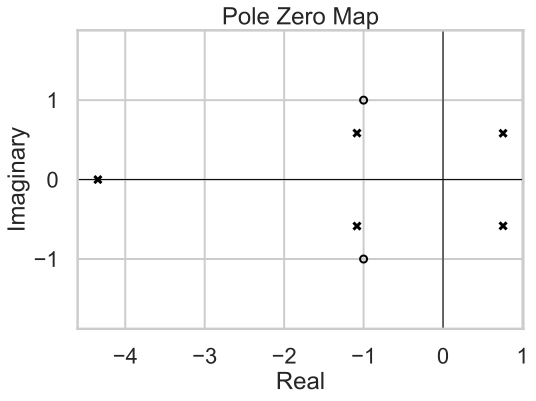

In [89]:
# Finding poles and zeros. 
poles = control.matlab.pole(G_h)
zeros = control.matlab.zero(G_h)

print('system poles: ', poles)
print('system zeros: ', zeros)

# Plotting
control.matlab.pzmap(G_h, Plot=True, grid=False, title='Pole Zero Map')

## Bode Plot

A Bode plot is a graph of the frequency response of the system, and is available through the function `bode_plot(sys, Plot=True, **args)`
Other **frequency plotting commands** can be found in [the documentation](https://python-control.readthedocs.io/en/0.8.3/control.html#frequency-domain-plotting), such as the Nyquist plot. The functions are called in much the same way.

A simple transfer function demonstrates how to produce a Bode plot. 
> **Note:** The semicolon after the function call supresses some of the output. If it is removed, the function will print arrays with the plotted data.

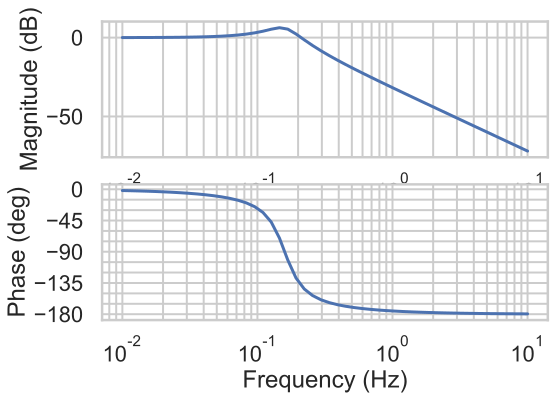

In [90]:
from control import *
g = tf([1], [1,0.5,1])

bode_plot(g,dB=True);

## System Interconnections



The Control library has several functions to create interconnected systems, which may be found at [this link.](https://python-control.readthedocs.io/en/0.8.3/control.html#system-interconnections)

Commands such as `parallel(sys1,sys2,...)` and `series(sys1,sys2,...)` are available to help connect systems easily. The operators `+` and `*` have been overriden for LTI class systems (including state space and transfer functions) and are a shortcut to perform those two functions respectively. 

**Example:** Defining two arbitrary first order systems and interconnecting them in parallel or series configuration.

In [91]:
g1 = tf(1, [1,1])
g2 = tf(1,[1,2])
print(parallel(g1,g2))


   2 s + 3
-------------
s^2 + 3 s + 2



In [92]:
print(g1+g2)


   2 s + 3
-------------
s^2 + 3 s + 2



In [93]:
print(series(g1,g2))


      1
-------------
s^2 + 3 s + 2



In [94]:
print(g1*g2)


      1
-------------
s^2 + 3 s + 2



The `feedback(sys1,sys2,sign)` function creates a positive or negative feedback interconnection between two systems. To secify sign, -1 for negative and 1 for positive; function assumes negative by default.

In [95]:
print(feedback(g1,g2, -1))


    s + 2
-------------
s^2 + 3 s + 3



## Second Order System Example: Damped Spring

The following example simulates a second order damped spring system with a step response.

This example is available with the current distribution of the Python Control library and can be found at [this link](https://python-control.readthedocs.io/en/0.8.3/secord-matlab.html) as well as in the in the *examples/* subdirecory of the source code distribution.

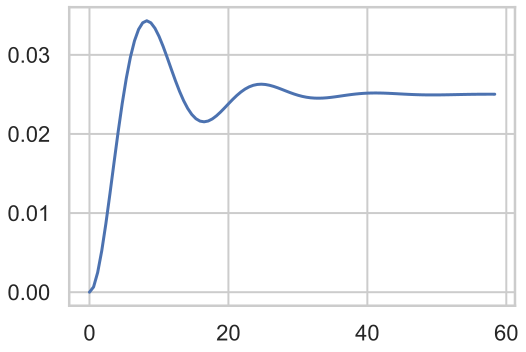

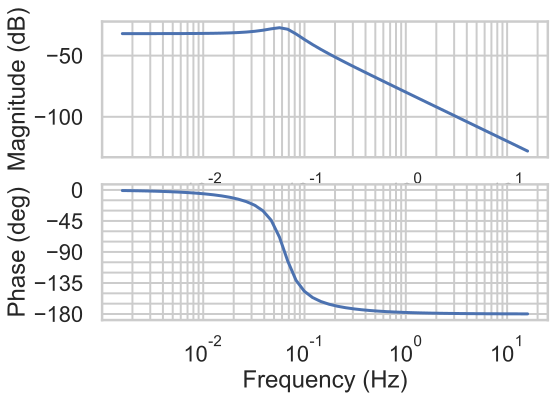

In [96]:
# secord.py - demonstrate some standard MATLAB commands
# RMM, 25 May 09

import matplotlib.pyplot as plt   # MATLAB plotting functions
from control.matlab import *  # MATLAB-like functions

# Parameters defining the system
m = 250.0           # system mass
k = 40.0            # spring constant
b = 60.0            # damping constant

# System matrices
A = [[0, 1.], [-k/m, -b/m]]
B = [[0], [1/m]]
C = [[1., 0]]
sys = ss(A, B, C, 0)

# Step response for the system
plt.figure(1)
yout, T = step(sys)
plt.plot(T.T, yout.T)
plt.show(block=False)

# Bode plot for the system
plt.figure(2)
mag, phase, om = bode(sys, logspace(-2, 2), Plot=True)
plt.show(block=False)

# Further Reading

This package has many uses beyond what is covered in this notebook. For further reading or examples, I would recommend the following:
1. [Wiki: Vertical takeoff and landing aircraft.](https://www.cds.caltech.edu/~murray/wiki/index.php?title=Python-control/Example:_Vertical_takeoff_and_landing_aircraft) This example was designed by the creators of the Python Control package to demonstrate the capabilities of the package. The second half of the example covers material similar to this notebook, and is well worth taking a look.
2. [Feedback Systems Textbook](http://www.cds.caltech.edu/~murray/amwiki/index.php/Second_Edition) This texbook is written by the creators of the Python Control package, and is a good overview of the theory behind the content covered in this notebook. 

# References

1. Seborg, D. E. [et al]. (2010). Process Dynamics and Control 3rd Edition. Hoboken, NJ: John Wiley & Sons.
2. "Python Control Systems Library — Python Control Systems Library dev documentation", Python-control.readthedocs.io, 2020. [Online]. Available: https://python-control.readthedocs.io/en/0.8.3/index.html. 